## Indian Electric Vehicle (EV) market Analysis from 2001 to 2024

This project focuses on a comprehensive analysis of the Indian Electric Vehicle (EV) market from 2001 to 2024. Leveraging detailed datasets encompassing EV sales trends, manufacturer performance, vehicle classifications, and charging infrastructure, the study aims to uncover meaningful insights into market dynamics. The core objective is to segment the market effectively, identify high-growth customer segments, and determine the most promising vehicle categories to support data-driven strategic decisions.



### STEP 1. DATA LOADING


Data Loading & Preprocessing
A total of six datasets were imported and preprocessed to prepare for EV market analysis:

EV-Maker-by-Place.csv – Cleaned by removing duplicate entries.

OperationalPC.csv – Converted the 'No. of Operational PCS' column from comma-separated strings to integers.

Vehicle-Class-All.csv – Cleaned and converted 'Total Registration' values to integers.

ev_cat_01-24.csv – Removed commas from all numeric fields and converted year-wise data to numeric types.

ev_sales_by_makers_and_cat_15-24.csv – Cleaned numeric sales data across years for each manufacturer and category.

Ev_by_place.csv – Cleaned and converted 'Annual Sales (Units)' to integers.

Common preprocessing steps included:

Removing duplicate records

Stripping commas from numeric fields

Converting relevant columns to appropriate numeric data types

Ensuring consistent formatting across all datasets for seamless analysis

These steps ensure the datasets are structured, clean, and analysis-ready.

In [3]:
import pandas as pd
import numpy as np

# Load datasets
ev_maker_place = pd.read_csv('EV Maker by Place.csv')
operational_pc = pd.read_csv('OperationalPC.csv')
vehicle_class = pd.read_csv('Vehicle Class - All.csv')
ev_cat = pd.read_csv('ev_cat_01-24.csv')
ev_sales = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
ev_by_place = pd.read_csv('Ev_by_place.csv')

# Clean duplicates
ev_maker_place = ev_maker_place.drop_duplicates()

# Clean and convert numeric values
operational_pc['No. of Operational PCS'] = operational_pc['No. of Operational PCS'].replace({',': ''}, regex=True).astype(int)

vehicle_class['Total Registration'] = vehicle_class['Total Registration'].replace({',': ''}, regex=True).astype(int)

ev_cat = ev_cat.replace({',': ''}, regex=True)
ev_cat.iloc[:, 1:] = ev_cat.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

ev_sales = ev_sales.replace({',': ''}, regex=True)
ev_sales.iloc[:, 2:] = ev_sales.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

ev_by_place = ev_by_place.replace({',': ''}, regex=True)
ev_by_place['Annual Sales (Units)'] = pd.to_numeric(ev_by_place['Annual Sales (Units)'], errors='coerce')


## STEP 2. DATA PREPROCESSING AND VISUALIZATION

C:\Users\addys\AppData\Local\Temp\ipykernel_17064\2658947473.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
C:\Users\addys\AppData\Local\Temp\ipykernel_17064\2658947473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
C:\Users\addys\AppData\Local\Temp\ipykernel_17064\2658947473.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cat_sales = cat_sales.set_index('Date').resample('Y').sum()


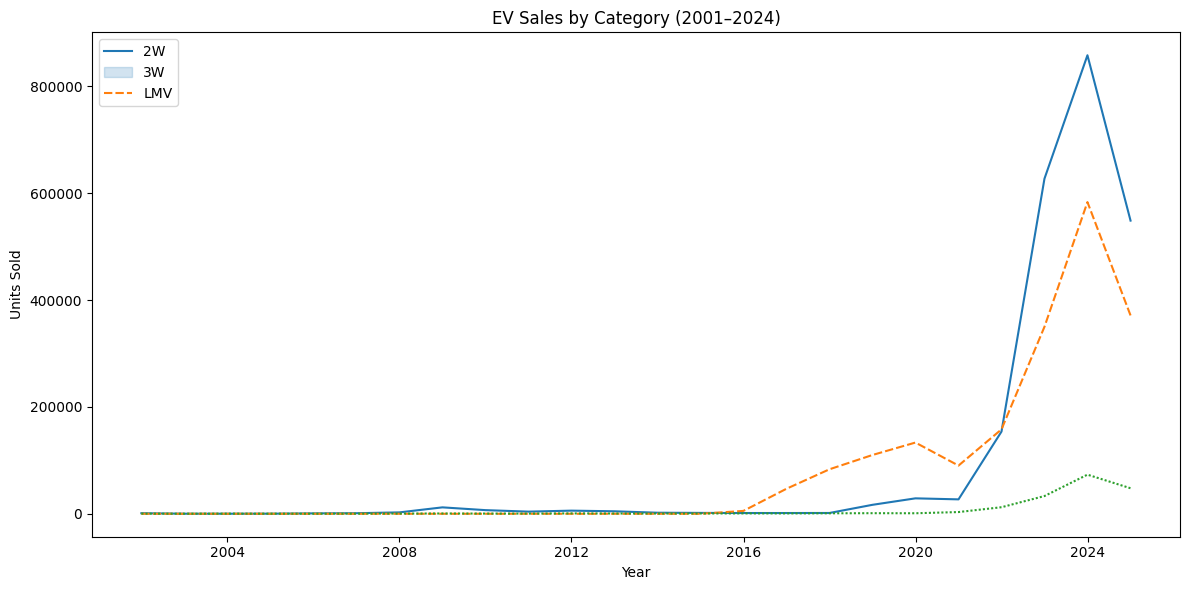

C:\Users\addys\AppData\Local\Temp\ipykernel_17064\2658947473.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No. of Operational PCS', y='State', data=top_states, palette='viridis')


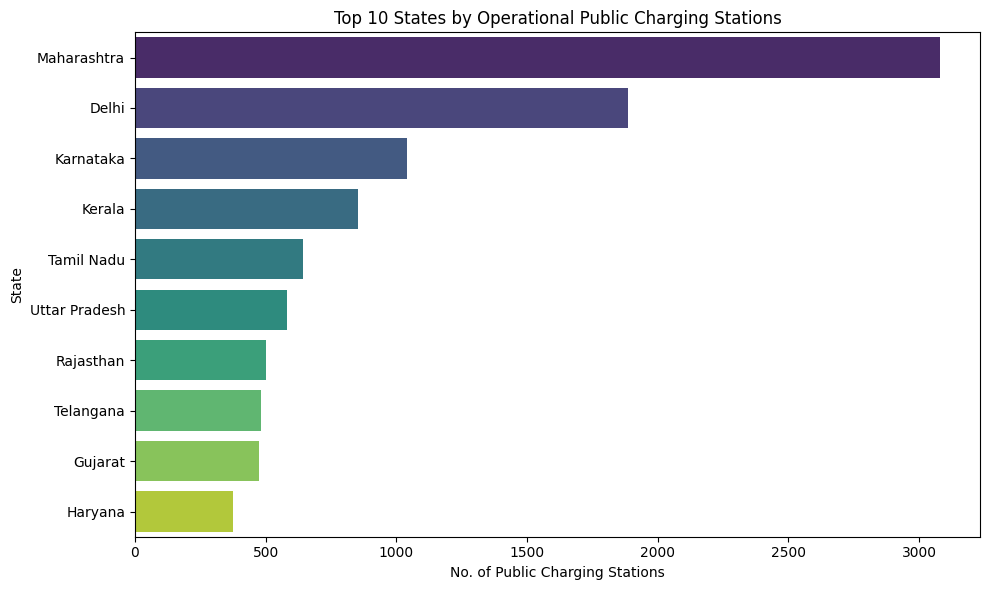

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_sales = ev_cat[['Date', 'TWO WHEELER(NT)', 'THREE WHEELER(T)', 'LIGHT MOTOR VEHICLE']]
cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
cat_sales = cat_sales.dropna(subset=['Date'])
cat_sales = cat_sales.set_index('Date').resample('Y').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cat_sales)
plt.title('EV Sales by Category (2001–2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(['2W', '3W', 'LMV'])
plt.tight_layout()
plt.show()

top_states = operational_pc.sort_values('No. of Operational PCS', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='No. of Operational PCS', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Operational Public Charging Stations')
plt.xlabel('No. of Public Charging Stations')
plt.ylabel('State')
plt.tight_layout()
plt.show()


## STEP 3. EXPLORATORY DATA ANALYSIS


In this step, we perform exploratory data analysis on the cleaned EV datasets.
We focus on analyzing sales trends by vehicle category (2W, 3W, LMV), identifying
top-performing regions based on charging infrastructure, calculating year-over-year growth,
and exploring the relationship between public charging availability and overall EV adoption
across Indian states.


C:\Users\addys\AppData\Local\Temp\ipykernel_17064\550091796.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
C:\Users\addys\AppData\Local\Temp\ipykernel_17064\550091796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
C:\Users\addys\AppData\Local\Temp\ipykernel_17064\550091796.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cat_sales = cat_sales.set_index('Date').resample('Y').sum()


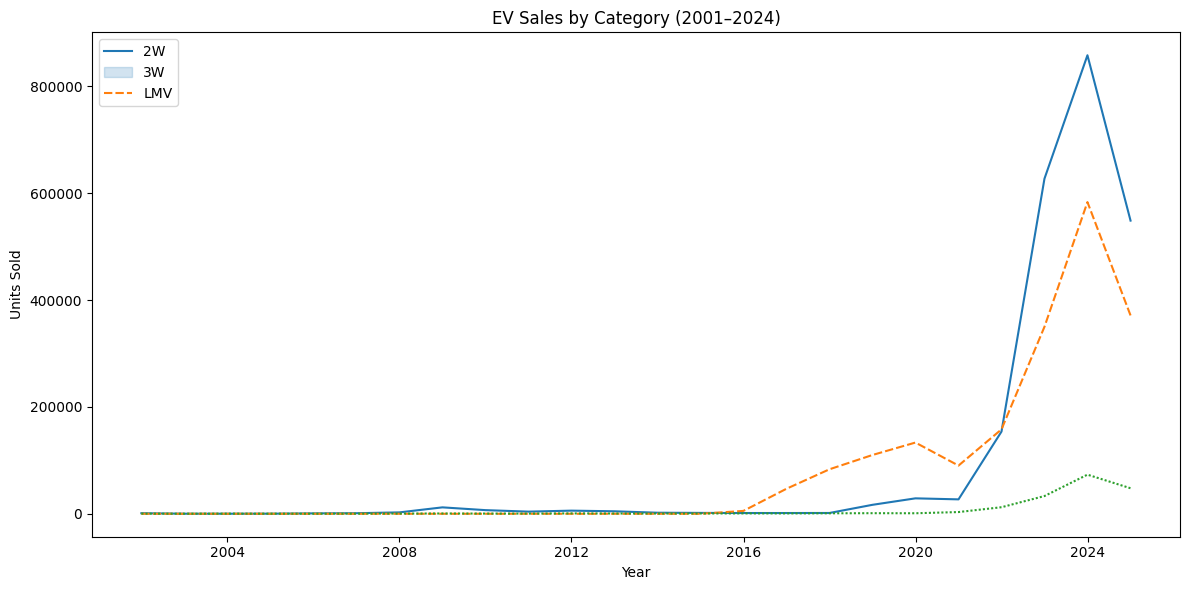

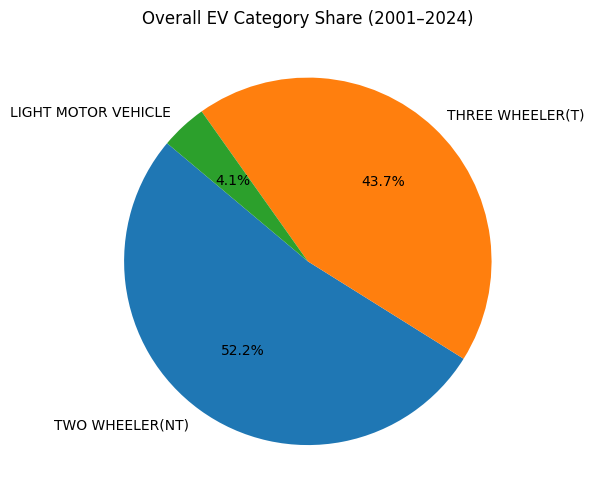

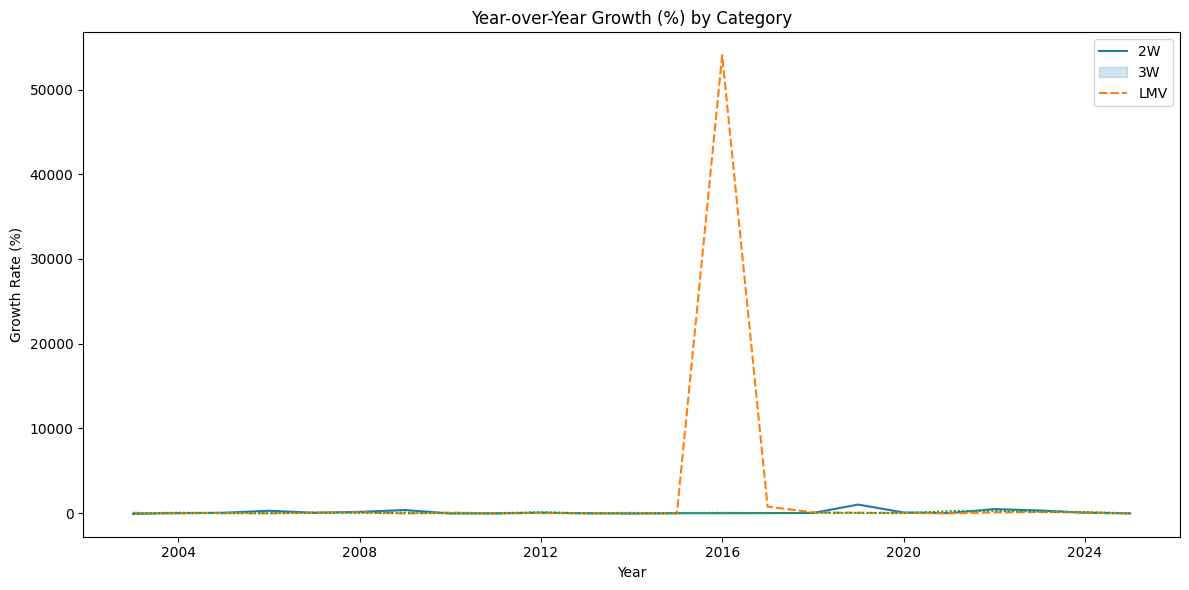

C:\Users\addys\AppData\Local\Temp\ipykernel_17064\550091796.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No. of Operational PCS', y='State', data=top_states, palette='viridis')


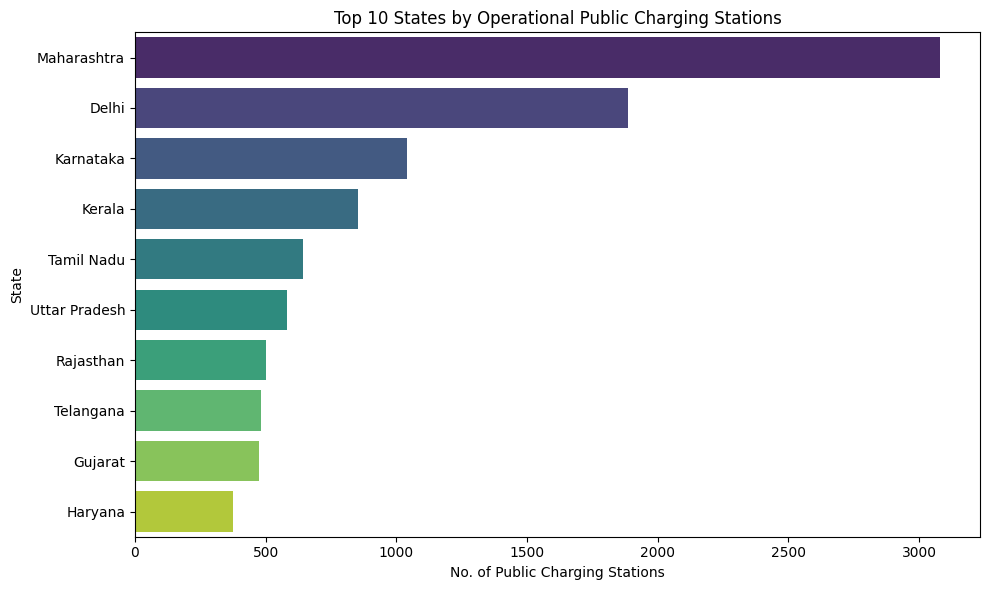

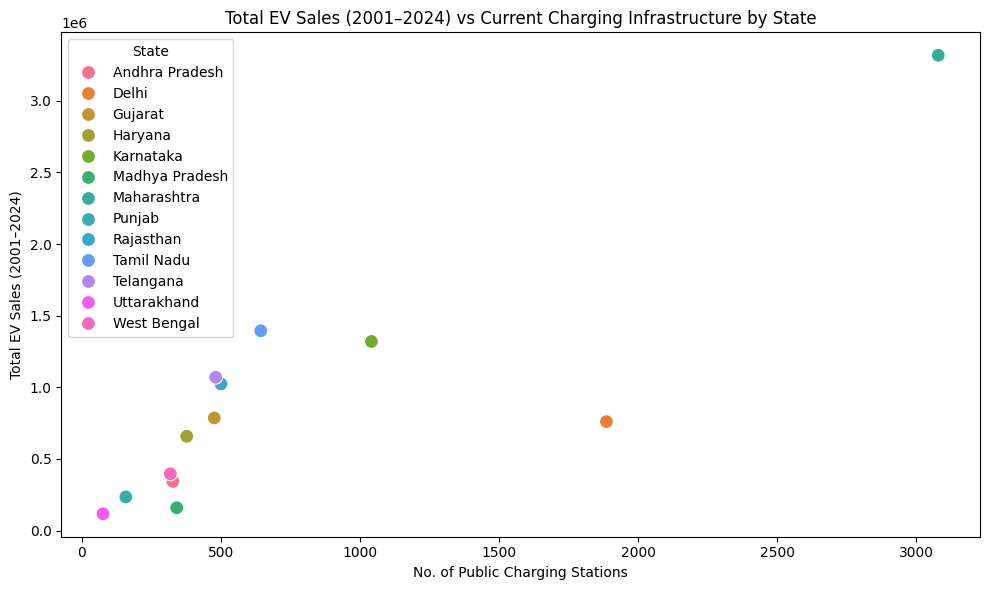

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Sales Trend Over Time by Category
cat_sales = ev_cat[['Date', 'TWO WHEELER(NT)', 'THREE WHEELER(T)', 'LIGHT MOTOR VEHICLE']]
cat_sales['Date'] = pd.to_datetime(cat_sales['Date'], errors='coerce')
cat_sales = cat_sales.dropna(subset=['Date'])
cat_sales = cat_sales.set_index('Date').resample('Y').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cat_sales)
plt.title('EV Sales by Category (2001–2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(['2W', '3W', 'LMV'])
plt.tight_layout()
plt.show()

# 2. Overall EV Market Share by Category (Cumulative)
total_by_cat = cat_sales.sum()
plt.figure(figsize=(6, 6))
plt.pie(total_by_cat, labels=total_by_cat.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall EV Category Share (2001–2024)')
plt.tight_layout()
plt.show()

# 3. Year-over-Year Growth by Category
yoy_growth = cat_sales.pct_change().dropna() * 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=yoy_growth)
plt.title('Year-over-Year Growth (%) by Category')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(['2W', '3W', 'LMV'])
plt.tight_layout()
plt.show()

# 4. Top 10 States by Operational Public Charging Stations
top_states = operational_pc.sort_values('No. of Operational PCS', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='No. of Operational PCS', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Operational Public Charging Stations')
plt.xlabel('No. of Public Charging Stations')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 5. Charging Infrastructure vs Total EV Sales by State
ev_by_place_grouped = ev_by_place.groupby('State')['Annual Sales (Units)'].sum().reset_index()
infra_sales = pd.merge(ev_by_place_grouped, operational_pc, on='State', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=infra_sales, x='No. of Operational PCS', y='Annual Sales (Units)', hue='State', s=100)
plt.title('Total EV Sales (2001–2024) vs Current Charging Infrastructure by State')

plt.xlabel('No. of Public Charging Stations')
plt.ylabel('Total EV Sales (2001–2024)')
plt.tight_layout()
plt.show()

## STEP 4. FEATURE ENGINEERING

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

ev_by_place['State'] = ev_by_place['State'].astype(str)
ev_by_place['Charging Stations'] = ev_by_place['Charging Stations'].replace({',': ''}, regex=True).astype(float)
ev_by_place['Market Share (%)'] = pd.to_numeric(ev_by_place['Market Share (%)'], errors='coerce')
ev_by_place['Production Capacity (Units/Year)'] = pd.to_numeric(ev_by_place['Production Capacity (Units/Year)'], errors='coerce')
ev_by_place['Annual Sales (Units)'] = pd.to_numeric(ev_by_place['Annual Sales (Units)'], errors='coerce')

features = ev_by_place[['Market Share (%)', 'Production Capacity (Units/Year)', 'Annual Sales (Units)', 'Charging Stations']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

label_enc = LabelEncoder()
ev_by_place['State_Code'] = label_enc.fit_transform(ev_by_place['State'])


## STEP 4. MARKET SEGMENTATION

In this step, K-Means clustering is applied to segment the Indian EV market based on 
state-level features such as market share, production capacity, annual sales, and charging infrastructure.
The goal is to group states into distinct clusters that represent different levels of market maturity,
infrastructure readiness, and growth potential.



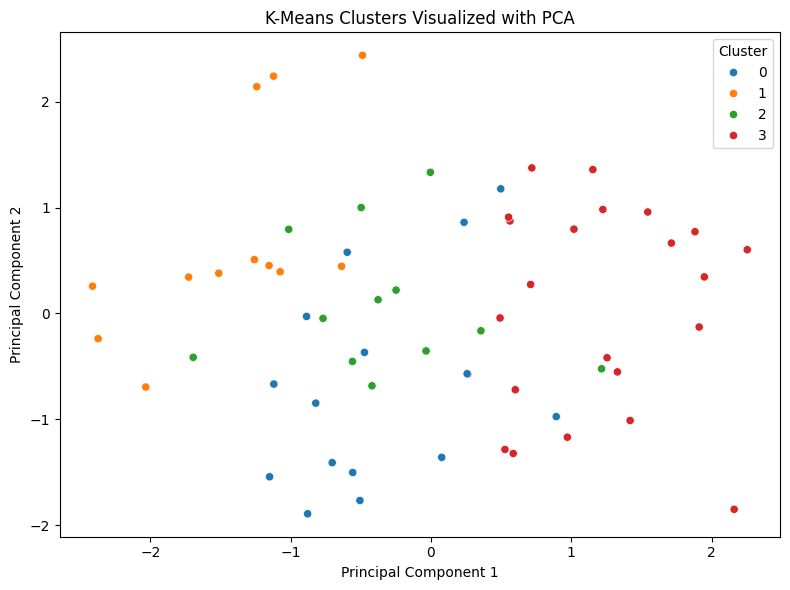

In [9]:


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
ev_by_place['PCA1'] = pca_features[:, 0]
ev_by_place['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=ev_by_place, palette='tab10')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


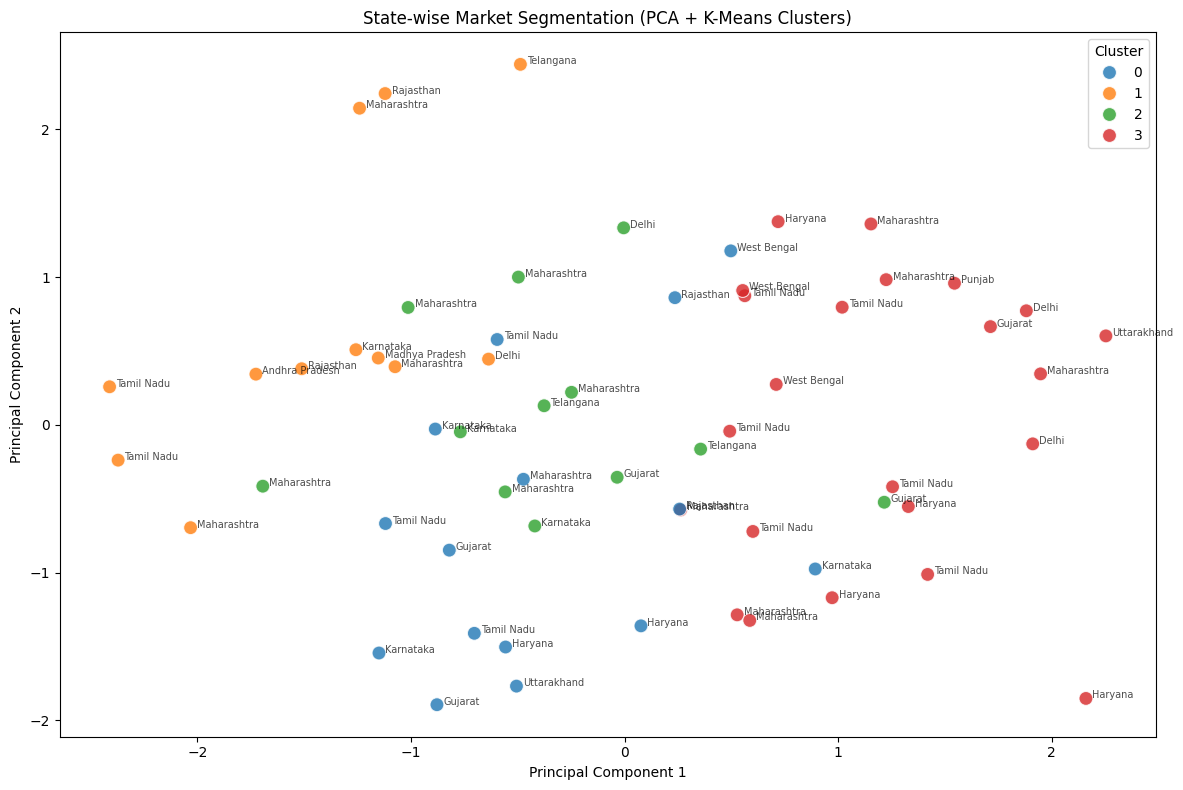

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=ev_by_place, palette='tab10', s=100, alpha=0.8)

for i in range(len(ev_by_place)):
    plt.text(ev_by_place['PCA1'][i]+0.03, ev_by_place['PCA2'][i], ev_by_place['State'].iloc[i], fontsize=7, alpha=0.7)

plt.title('State-wise Market Segmentation (PCA + K-Means Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


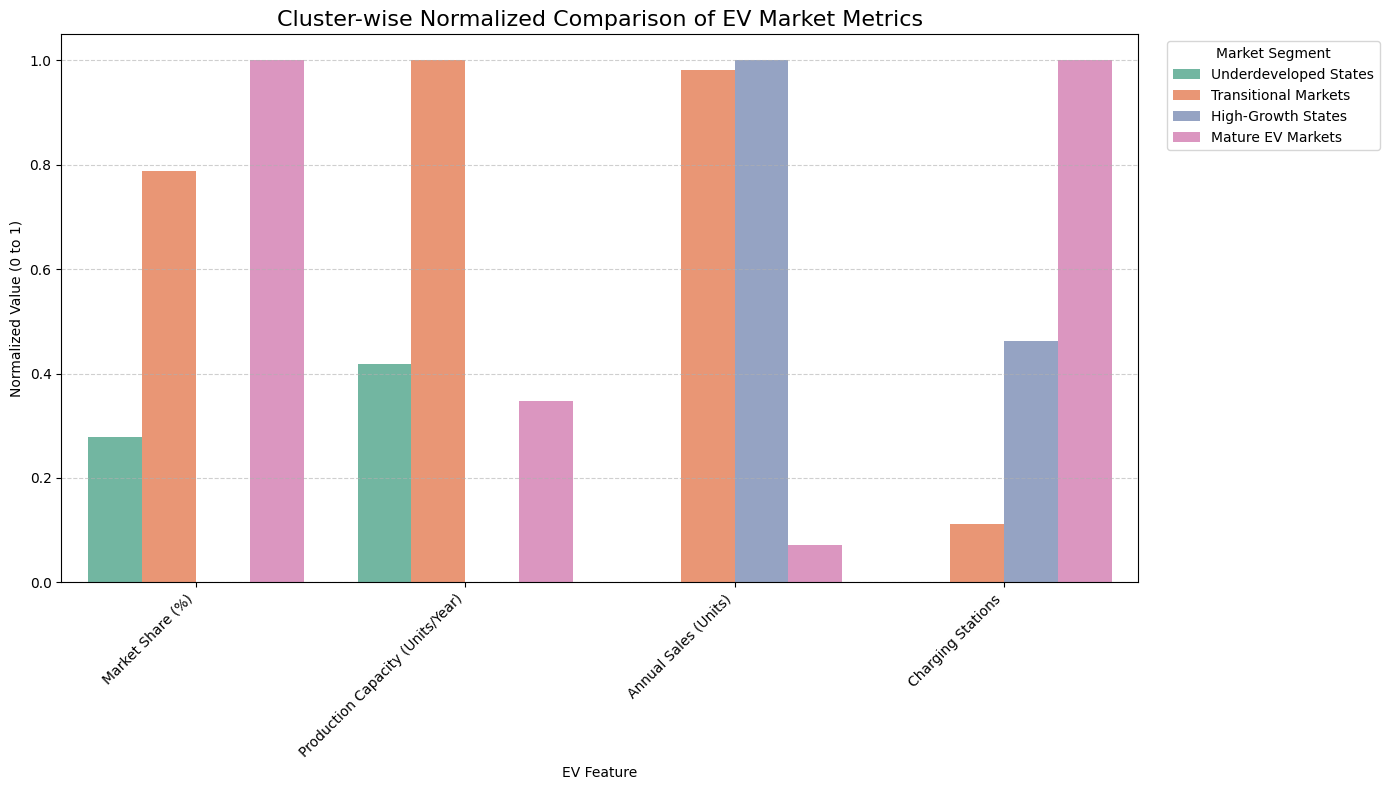

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select and scale numeric features for visual comparison
cluster_features = ev_by_place.groupby('Cluster')[[
    'Market Share (%)',
    'Production Capacity (Units/Year)',
    'Annual Sales (Units)',
    'Charging Stations'
]].mean()

# Normalize for visual scaling
scaler = MinMaxScaler()
cluster_scaled = pd.DataFrame(scaler.fit_transform(cluster_features), 
                              columns=cluster_features.columns, 
                              index=cluster_features.index)

# Map readable names
cluster_scaled.index = [
    'Underdeveloped States',
    'Transitional Markets',
    'High-Growth States',
    'Mature EV Markets'
]

# Reshape for seaborn barplot
cluster_scaled = cluster_scaled.reset_index().rename(columns={'index': 'Cluster'})
melted_scaled = cluster_scaled.melt(id_vars='Cluster', var_name='Feature', value_name='Normalized Value')

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_scaled, x='Feature', y='Normalized Value', hue='Cluster', palette='Set2')
plt.title('Cluster-wise Normalized Comparison of EV Market Metrics', fontsize=16)
plt.ylabel('Normalized Value (0 to 1)')
plt.xlabel('EV Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Market Segment', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [14]:
# Assign readable cluster labels
cluster_labels = {
    0: 'Underdeveloped States',
    1: 'Transitional Markets',
    2: 'High-Growth States',
    3: 'Mature EV Markets'
}

ev_by_place['Cluster_Name'] = ev_by_place['Cluster'].map(cluster_labels)

# Create final summary table
summary_table = ev_by_place.groupby('Cluster_Name')[[
    'Market Share (%)',
    'Production Capacity (Units/Year)',
    'Annual Sales (Units)',
    'Charging Stations'
]].mean().round(2).sort_index()

print("📊 Final Cluster Summary:\n")
print(summary_table)


📊 Final Cluster Summary:

                       Market Share (%)  Production Capacity (Units/Year)  \
Cluster_Name                                                                
High-Growth States                10.12                         150589.25   
Mature EV Markets                 18.63                         234889.91   
Transitional Markets              16.83                         393101.75   
Underdeveloped States             12.49                         251925.00   

                       Annual Sales (Units)  Charging Stations  
Cluster_Name                                                    
High-Growth States                311532.67             930.58  
Mature EV Markets                 115296.52            1581.00  
Transitional Markets              307610.00             508.25  
Underdeveloped States             100154.20             372.47  


In [15]:
# Final cluster name mapping
cluster_name_mapping = {
    0: 'Underdeveloped States',
    1: 'Transitional Markets',
    2: 'High-Growth States',
    3: 'Mature EV Markets'
}

# Apply mapping to DataFrame
ev_by_place['Cluster Name'] = ev_by_place['Cluster'].map(cluster_name_mapping)

# Group states by cluster name
segment_states = ev_by_place.groupby('Cluster Name')['State'].apply(list).reset_index()

# Print list of states in each segment
for i, row in segment_states.iterrows():
    print(f"\n📍 {row['Cluster Name']}:")
    for state in row['State']:
        print("   -", state)



📍 High-Growth States:
   - Karnataka
   - Maharashtra
   - Maharashtra
   - Telangana
   - Maharashtra
   - Karnataka
   - Gujarat
   - Maharashtra
   - Maharashtra
   - Telangana
   - Gujarat
   - Delhi

📍 Mature EV Markets:
   - Maharashtra
   - Delhi
   - Tamil Nadu
   - Gujarat
   - Tamil Nadu
   - Haryana
   - Maharashtra
   - Tamil Nadu
   - Haryana
   - Maharashtra
   - Haryana
   - Tamil Nadu
   - Maharashtra
   - Tamil Nadu
   - Tamil Nadu
   - West Bengal
   - Punjab
   - Maharashtra
   - Haryana
   - Uttarakhand
   - West Bengal
   - Maharashtra
   - Delhi

📍 Transitional Markets:
   - Karnataka
   - Tamil Nadu
   - Maharashtra
   - Rajasthan
   - Maharashtra
   - Telangana
   - Tamil Nadu
   - Andhra Pradesh
   - Madhya Pradesh
   - Maharashtra
   - Rajasthan
   - Delhi

📍 Underdeveloped States:
   - Karnataka
   - Tamil Nadu
   - Tamil Nadu
   - Haryana
   - Gujarat
   - Maharashtra
   - West Bengal
   - Gujarat
   - Rajasthan
   - Karnataka
   - Rajasthan
   - Karnataka


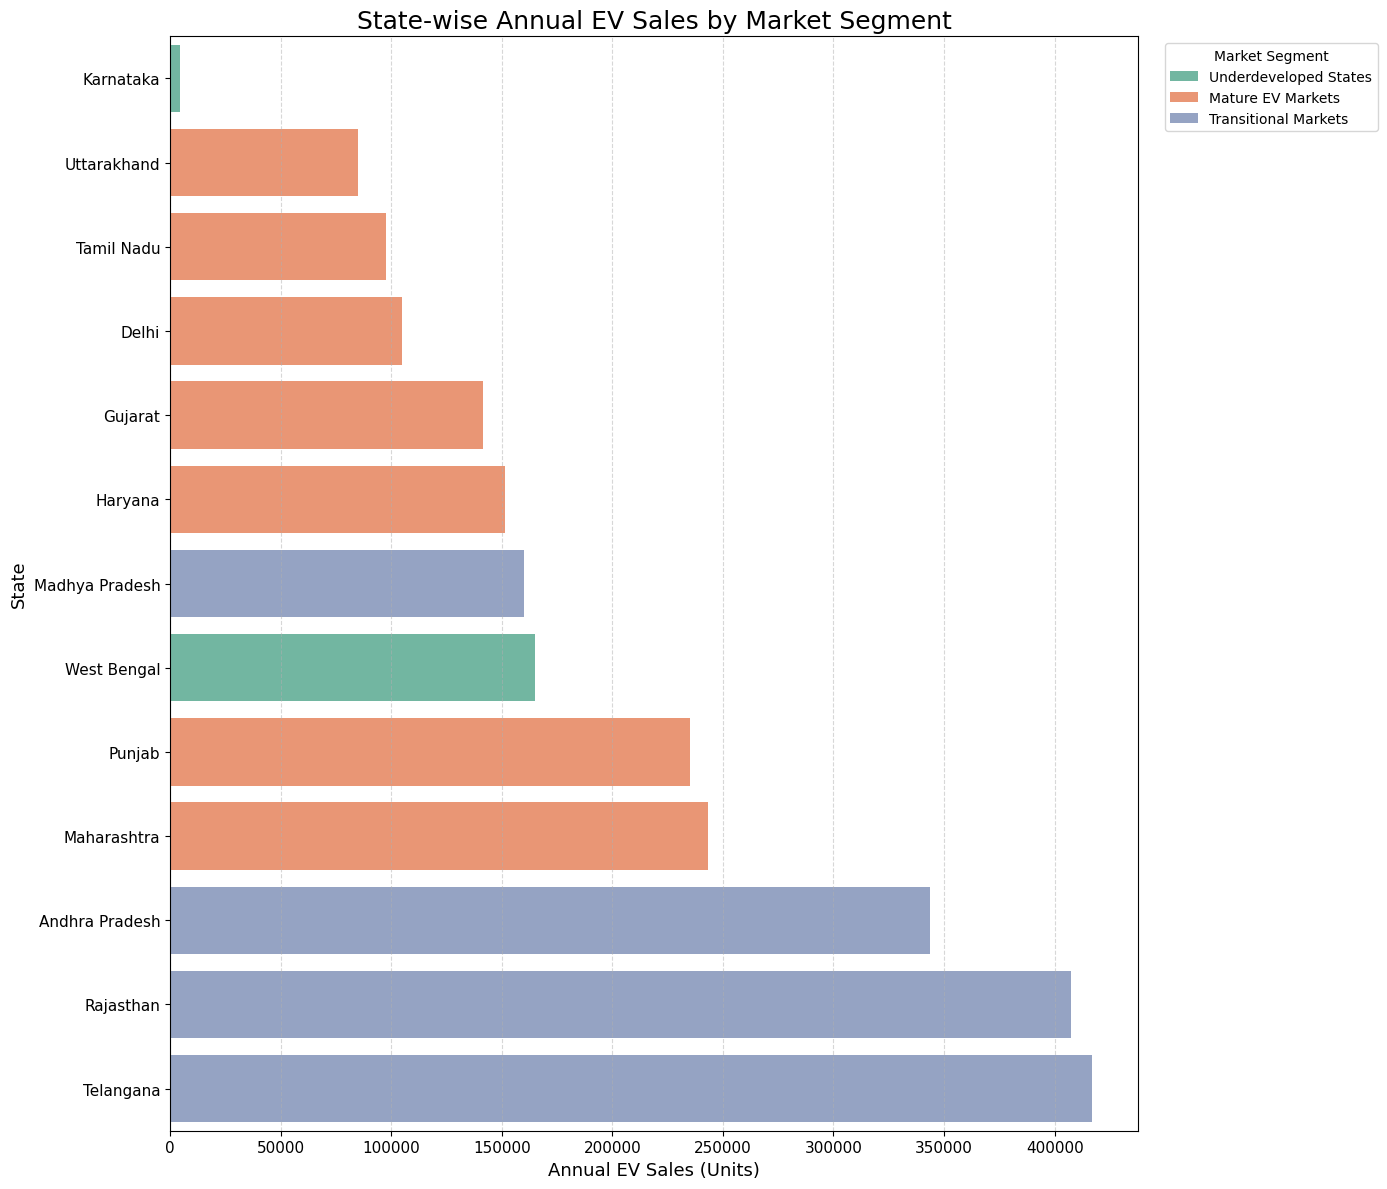

In [18]:
plt.figure(figsize=(14, 12))

# Drop duplicates to ensure one row per state (fix overlapping colors)
plot_data = ev_by_place.drop_duplicates(subset='State').sort_values('Annual Sales (Units)', ascending=True)

# Professional horizontal bar chart without error bars
sns.barplot(
    data=plot_data,
    x='Annual Sales (Units)',
    y='State',
    hue='Cluster Name',
    dodge=False,
    palette='Set2',
    errorbar=None  # disables error bars (fixes the black lines)
)

plt.title('State-wise Annual EV Sales by Market Segment', fontsize=18)
plt.xlabel('Annual EV Sales (Units)', fontsize=13)
plt.ylabel('State', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Market Segment', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

